In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = ['Heiti TC']

In [4]:
df = pd.read_excel('/Users/richardpang/Desktop/idc_intern-1/province analysis/test.xlsx')


In [5]:
province_lst = df.省份.unique().tolist()
print('省份数量',len(df.省份.unique().tolist()))
print('省份：：',province_lst)
column_lst = list(df.columns)
# column_lst = column_lst[2:]
# column_lst = ['GDP','人口（万）', '农村人均可支配收入','城镇人均可支配收入']
# column_lst = ['城镇人均可支配收入']
print('列：',column_lst)
column_lst = column_lst[8:9]
print(column_lst)

省份数量 33
省份：： ['SiChuan', 'Inner Mongolia', 'XinJiang', 'GanSu', 'HeiLongJiang', 'TiBet', 'JiangXi', 'HuNan', 'ZheJiang', 'ShaanXi', 'GuiZhou', 'HuBei', 'YunNan', 'HeBei', 'AnHui', 'ShanDong', 'LiaoNing', 'JiLin', 'FuJian', 'HeNan', 'ShanXi', 'GuangXi', 'HaiNan', 'QingHai', 'JiangSu', 'Beijing', 'GuangDongxSZ', 'Unavailable', 'ChongQing', 'NingXia', 'Shanghai', 'Shenzhen', 'Tianjin']
列： ['区县', '省份', 'GDP', '第一产业GDP', '人口（万）', '农村人均可支配收入', '第二产业GDP', '第三产业GDP', '社会消费品零售总额', '城镇人均可支配收入']
['社会消费品零售总额']


## Select bar chart with 城镇人均，农村人均

### Find top 10 城镇人均 in each province

In [ ]:
df.plot.bar(x = 'Name', y = ['Events1', 'Events2'], rot = 40)

In [ ]:
fig, ax = plt.subplots()
df.plot.bar(x = 'Name', y = ['Events1', 'Events2'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

In [5]:
for column in column_lst:
    df[column] = df[column].astype(float)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


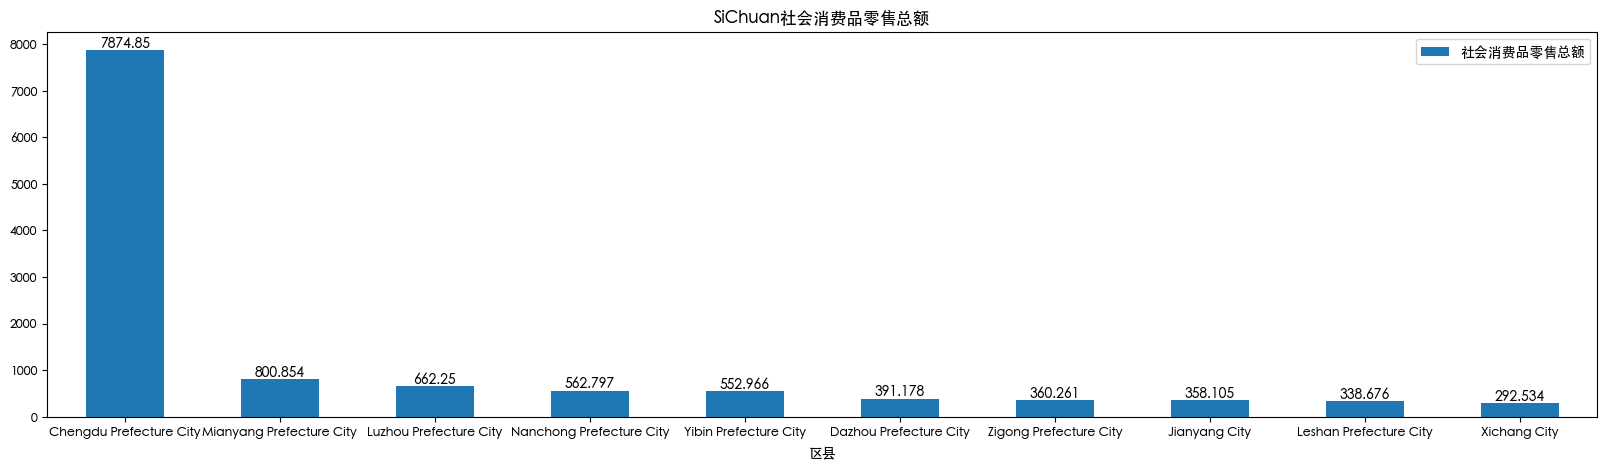

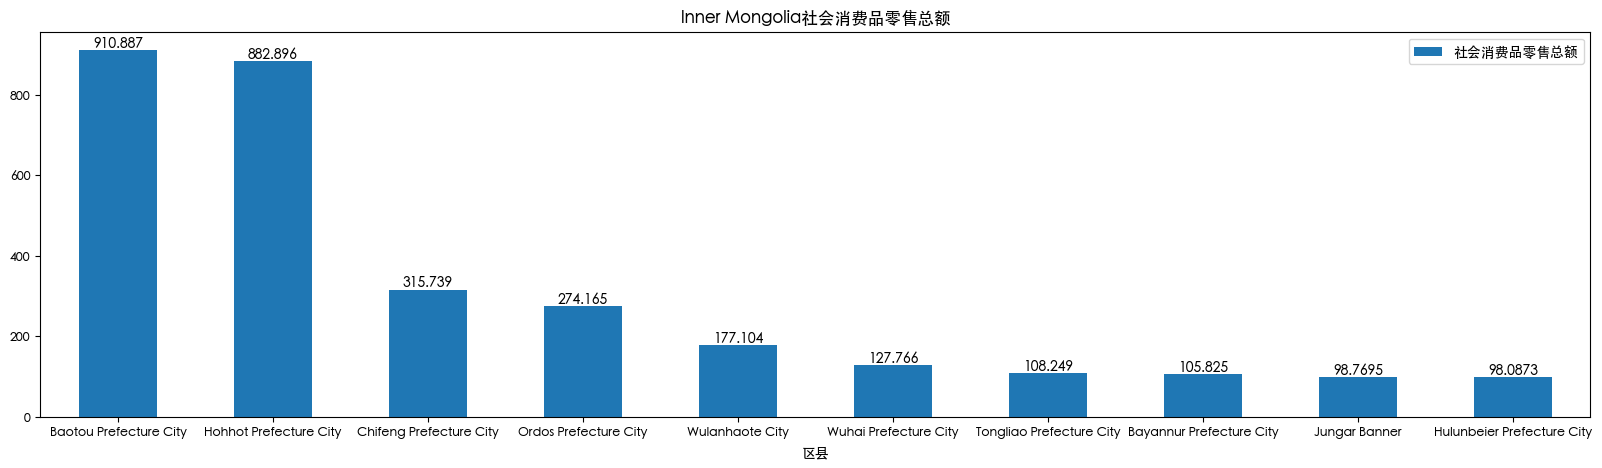

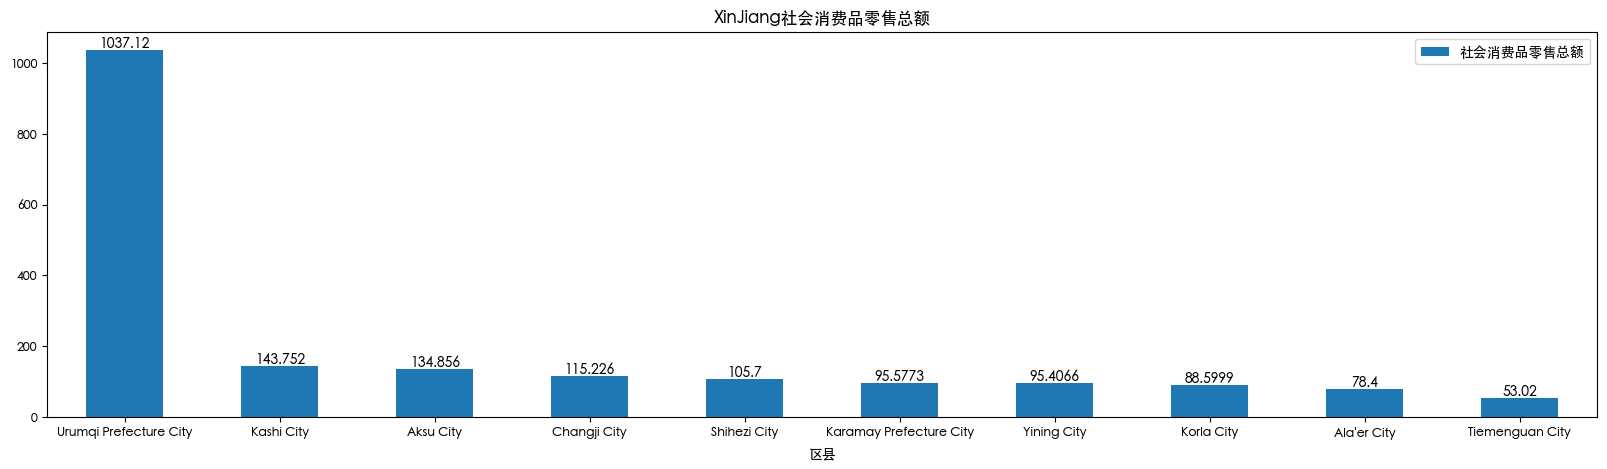

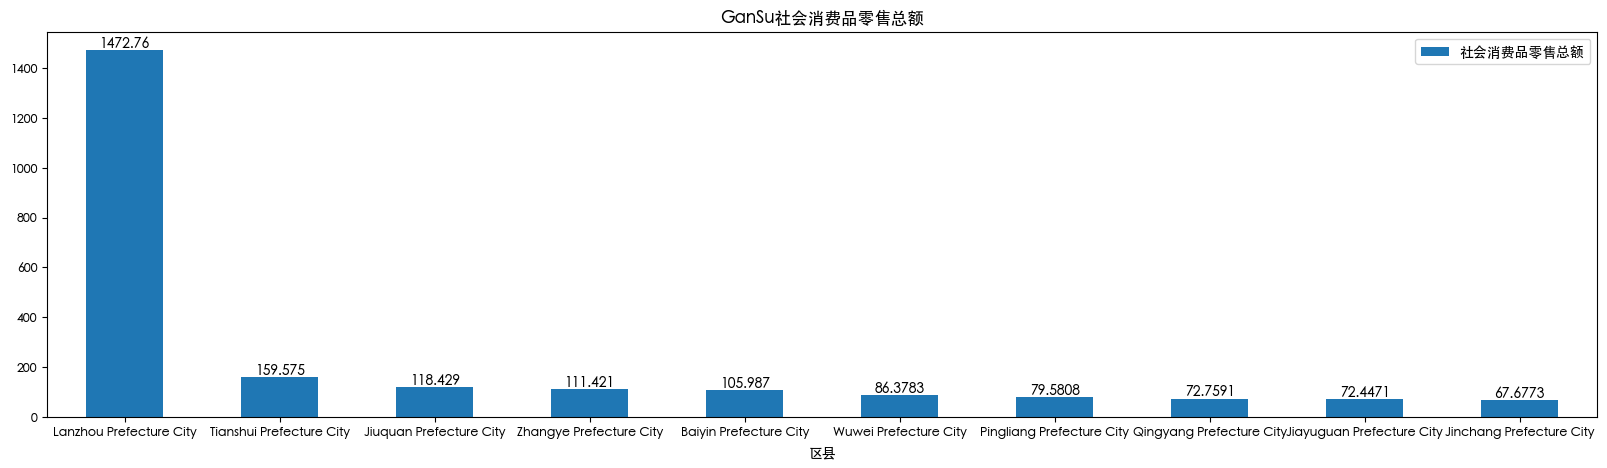

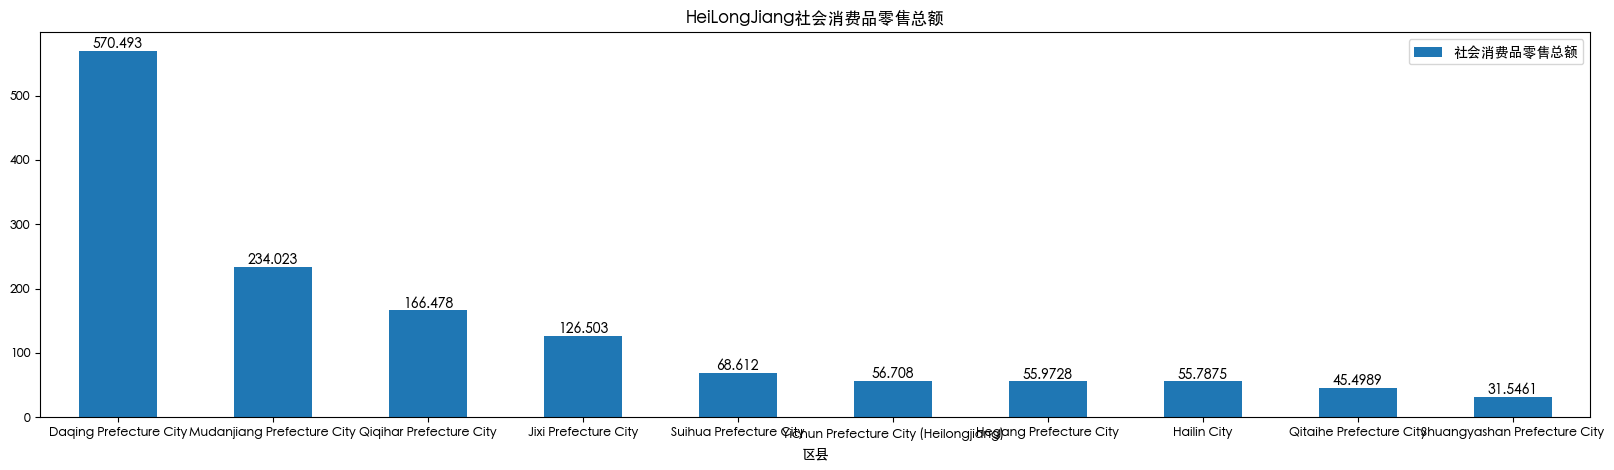

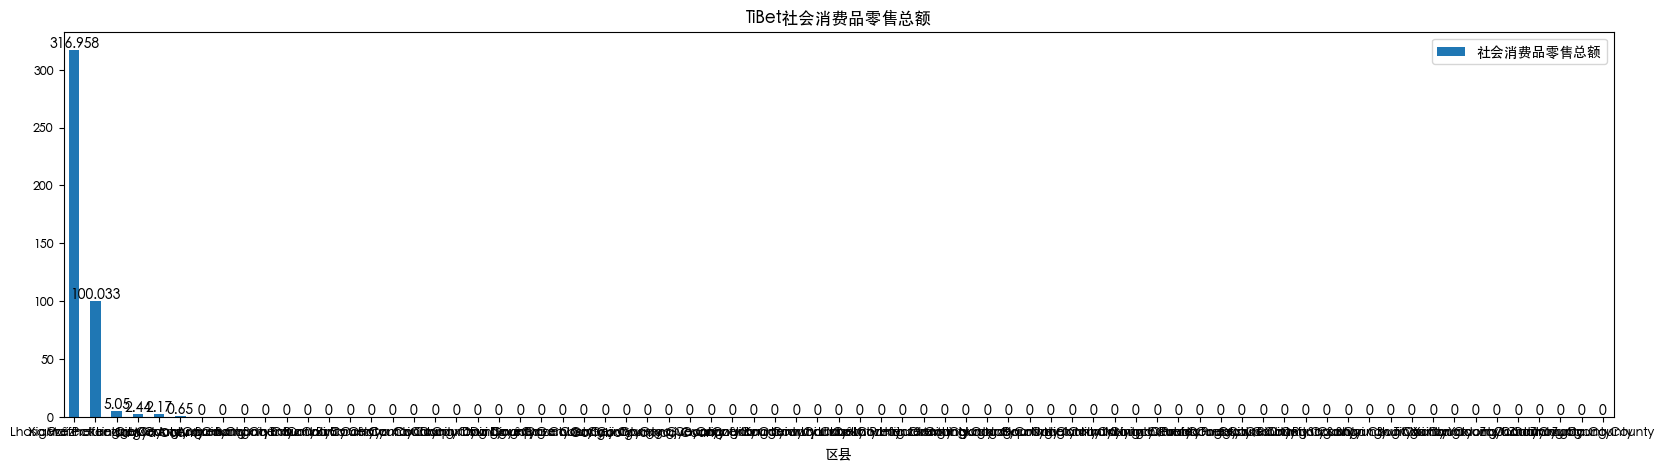

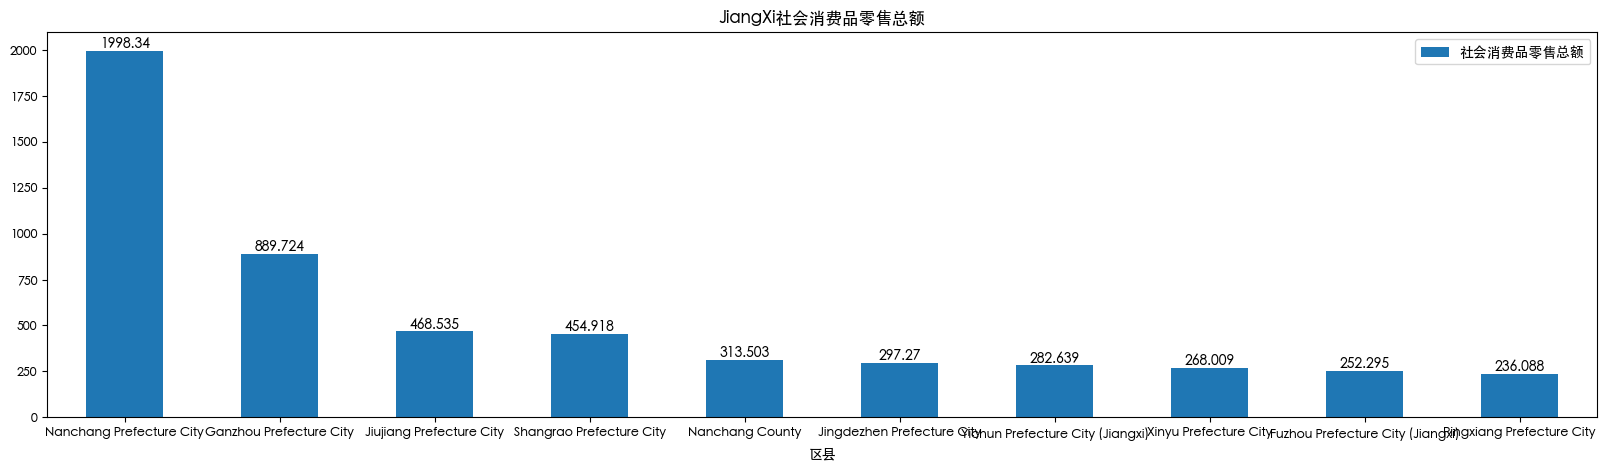

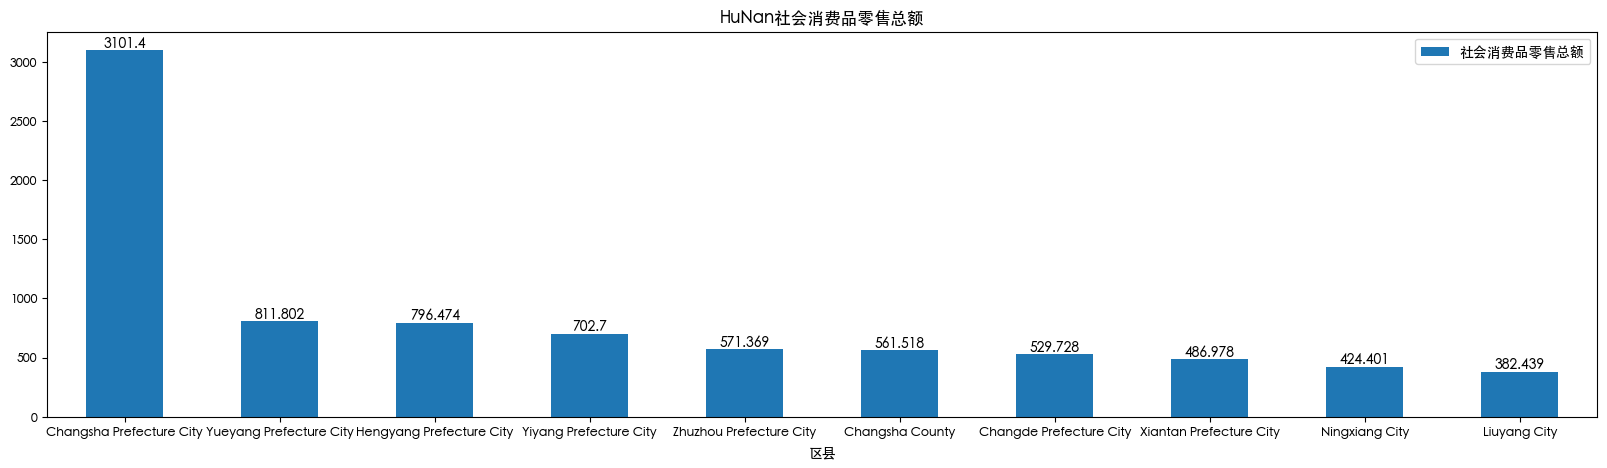

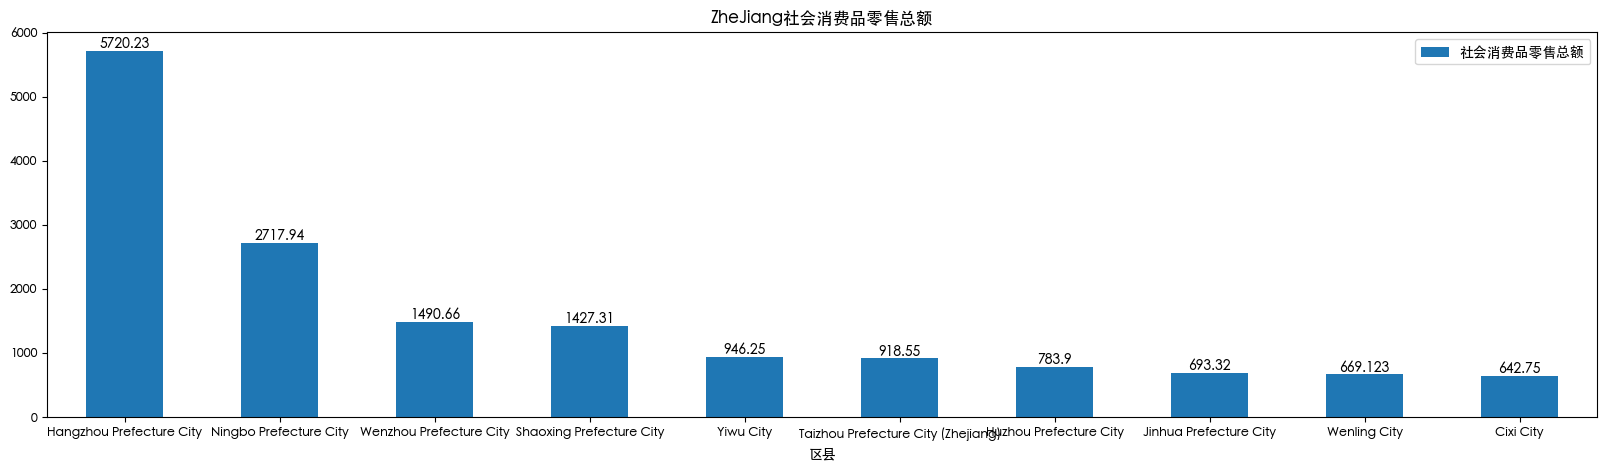

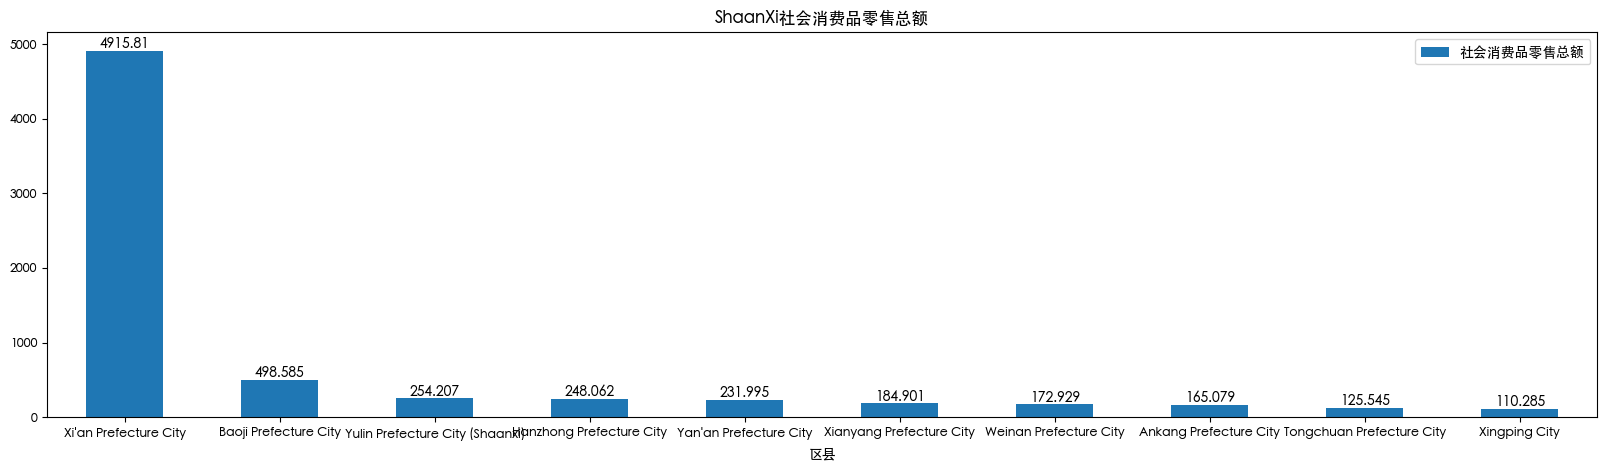

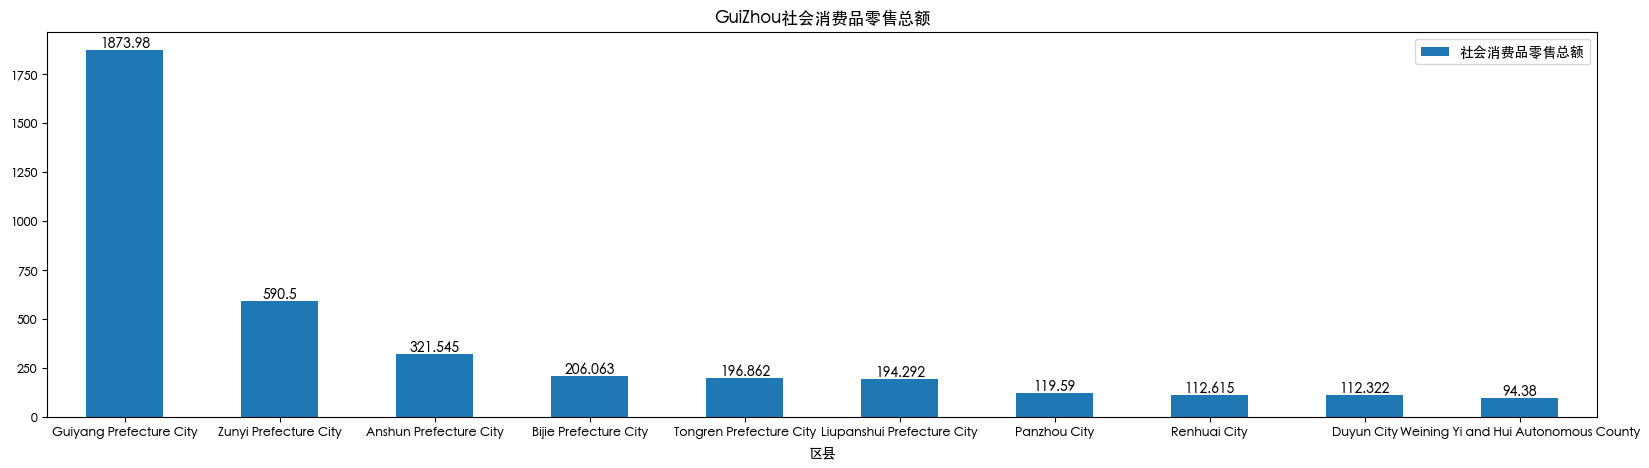

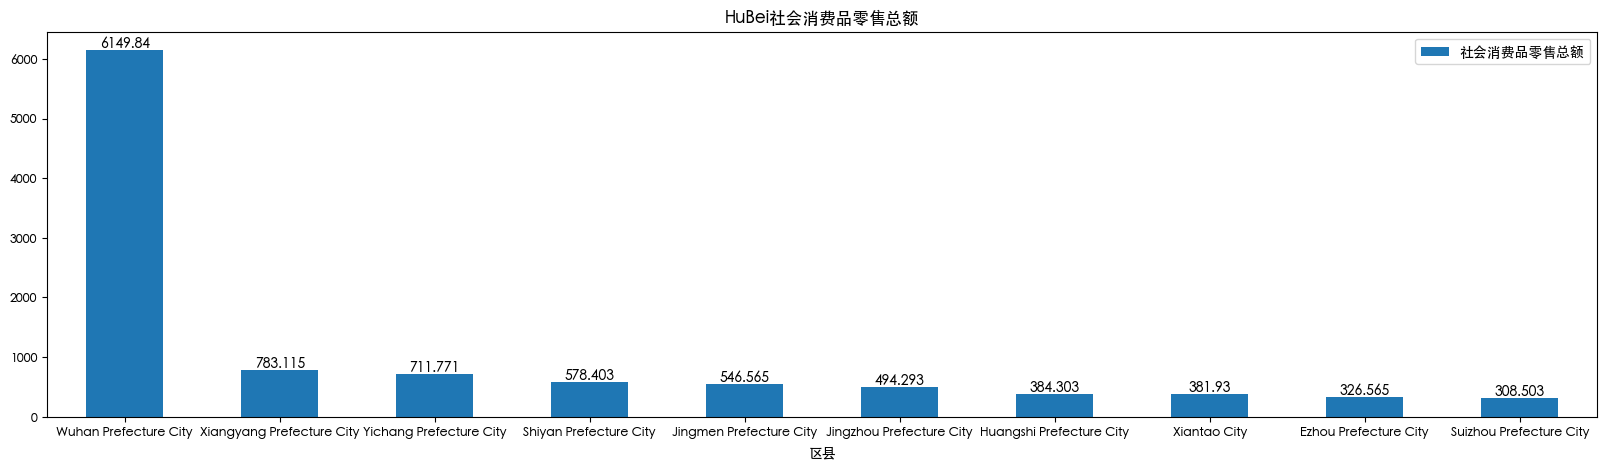

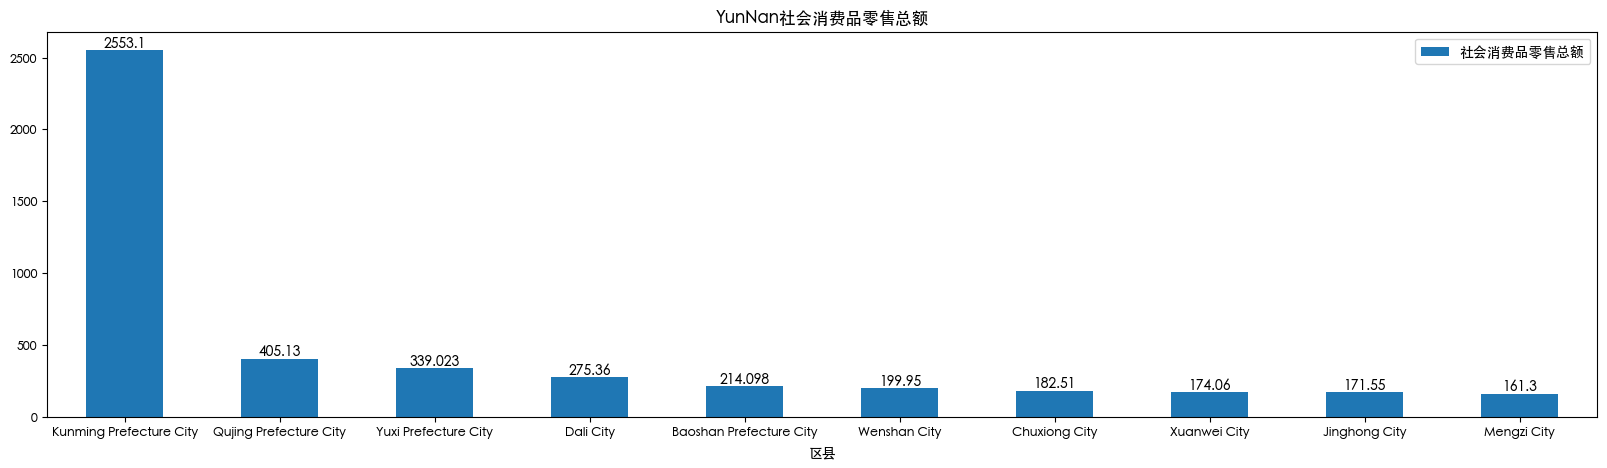

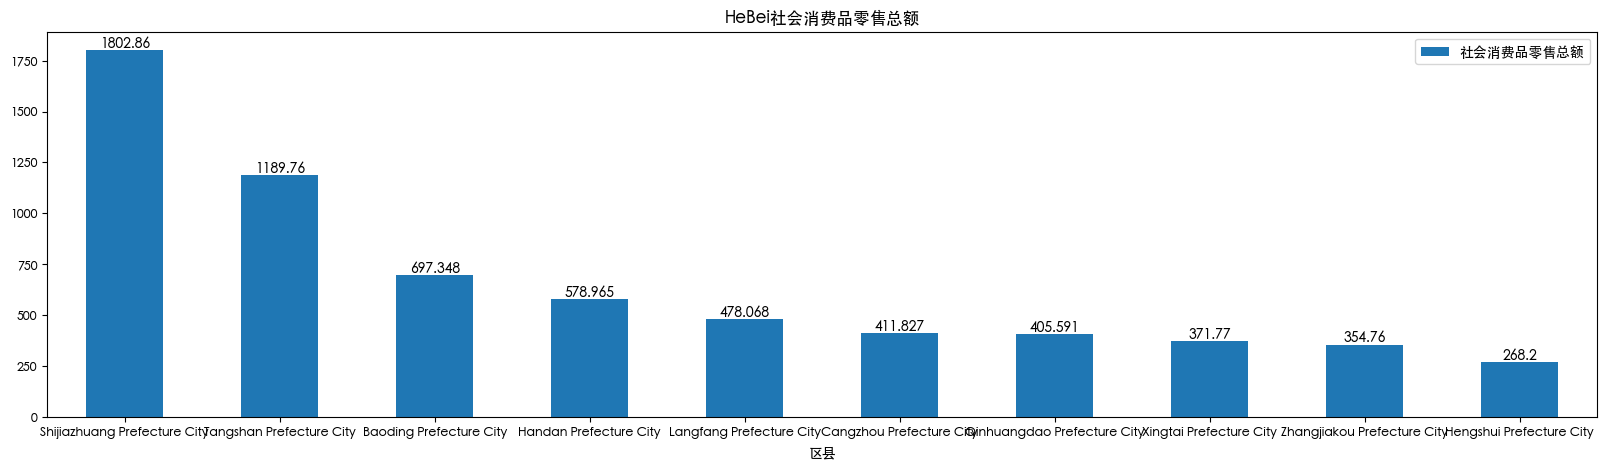

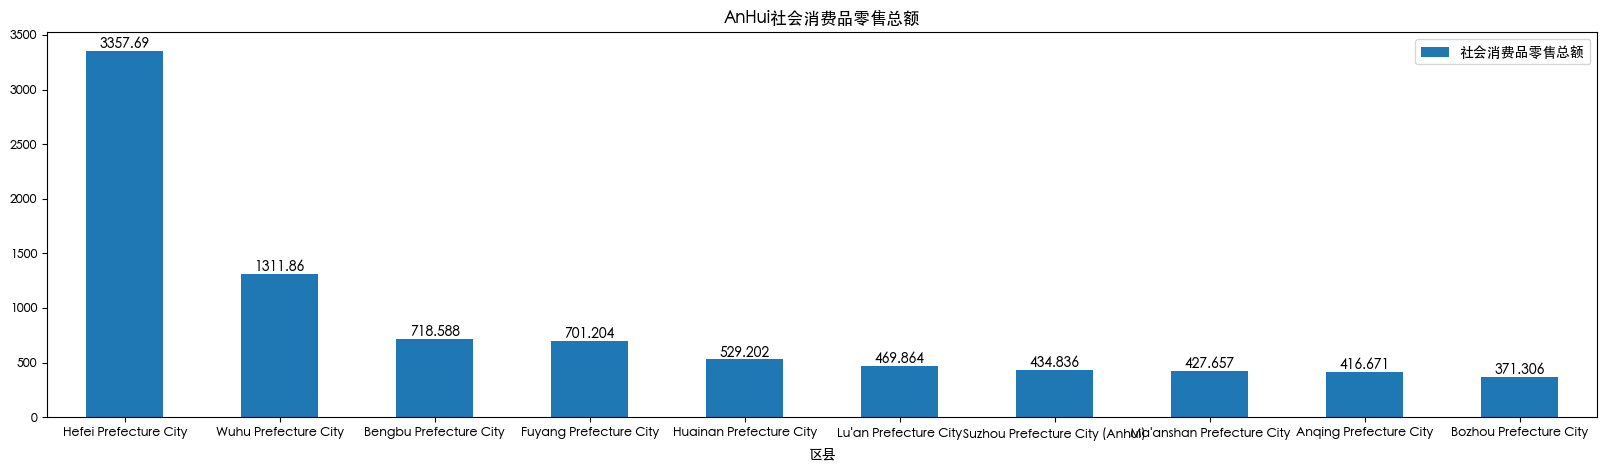

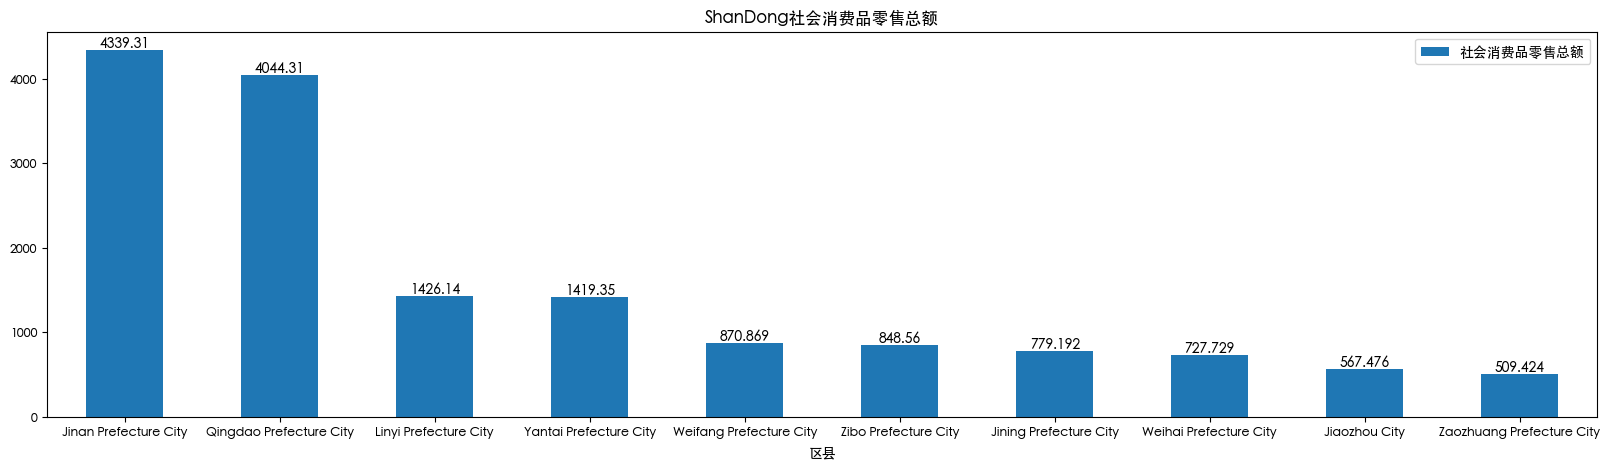

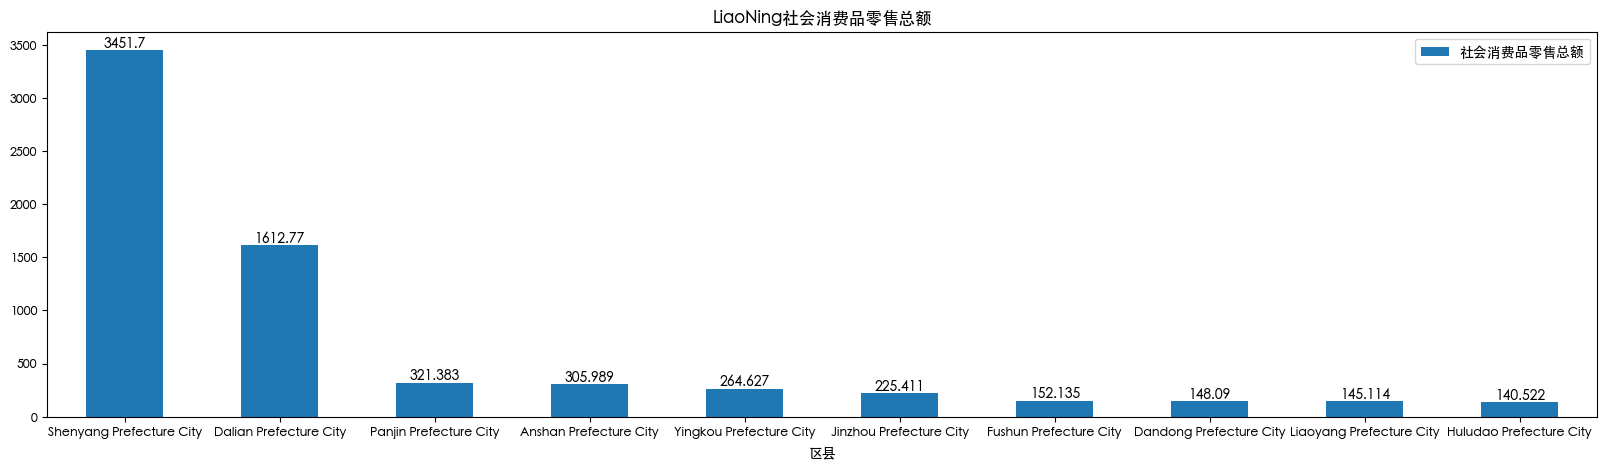

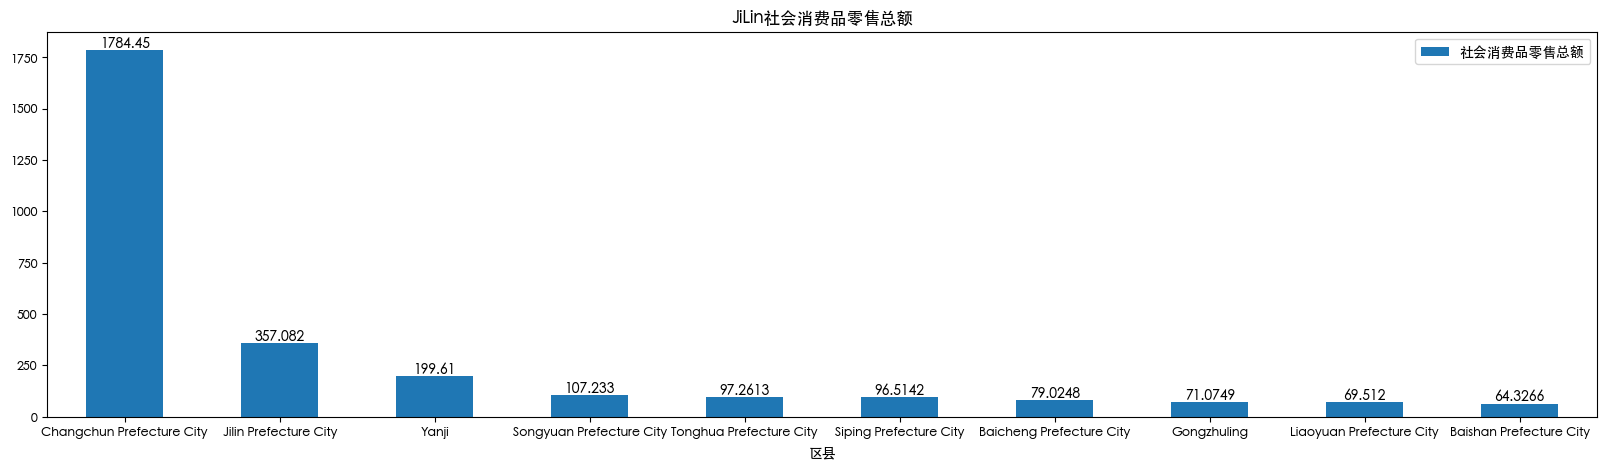

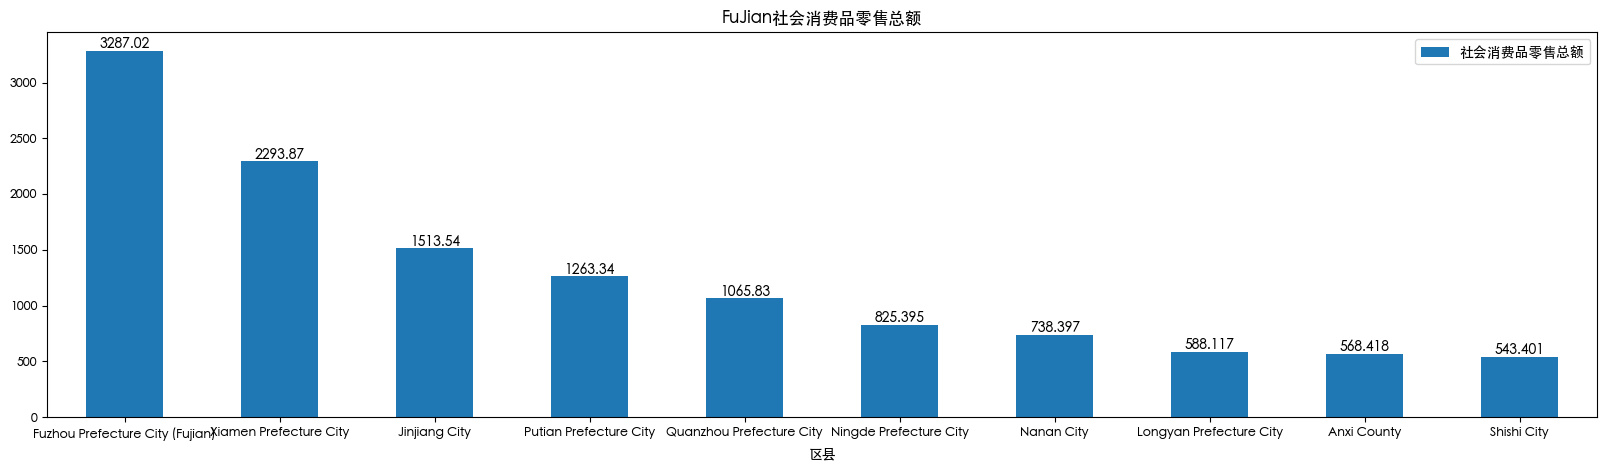

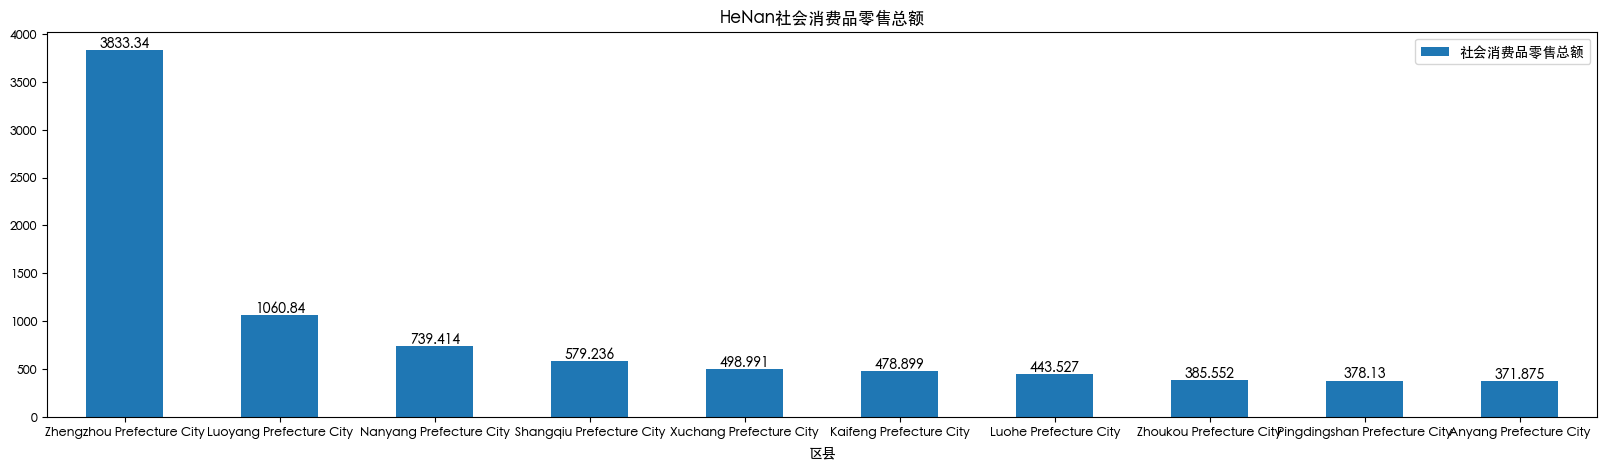

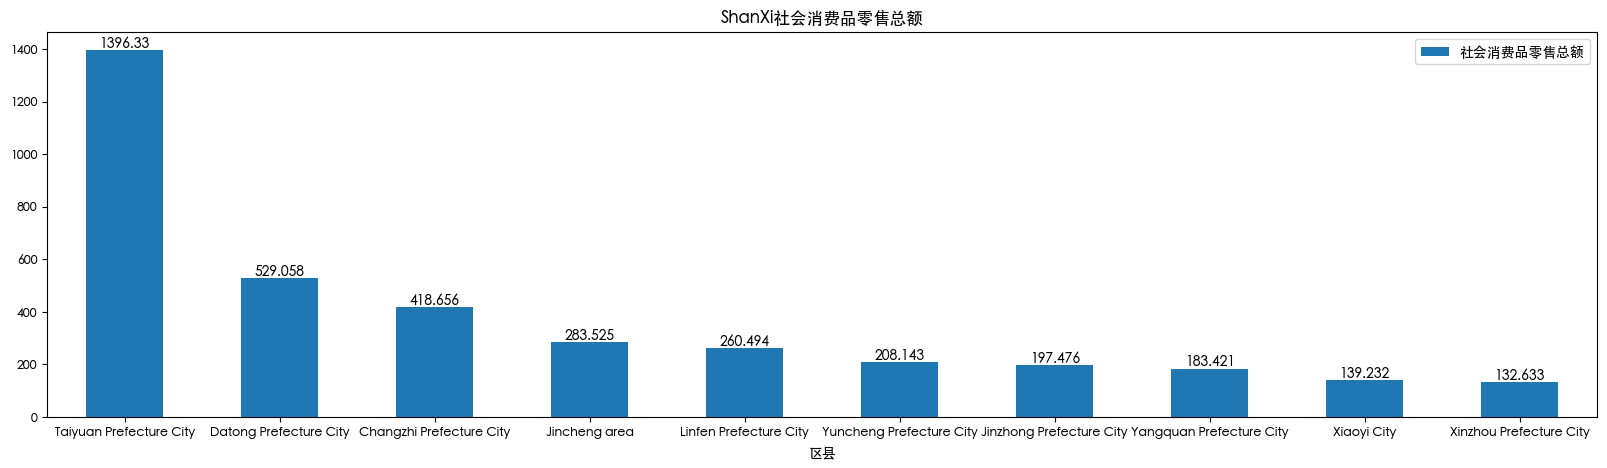

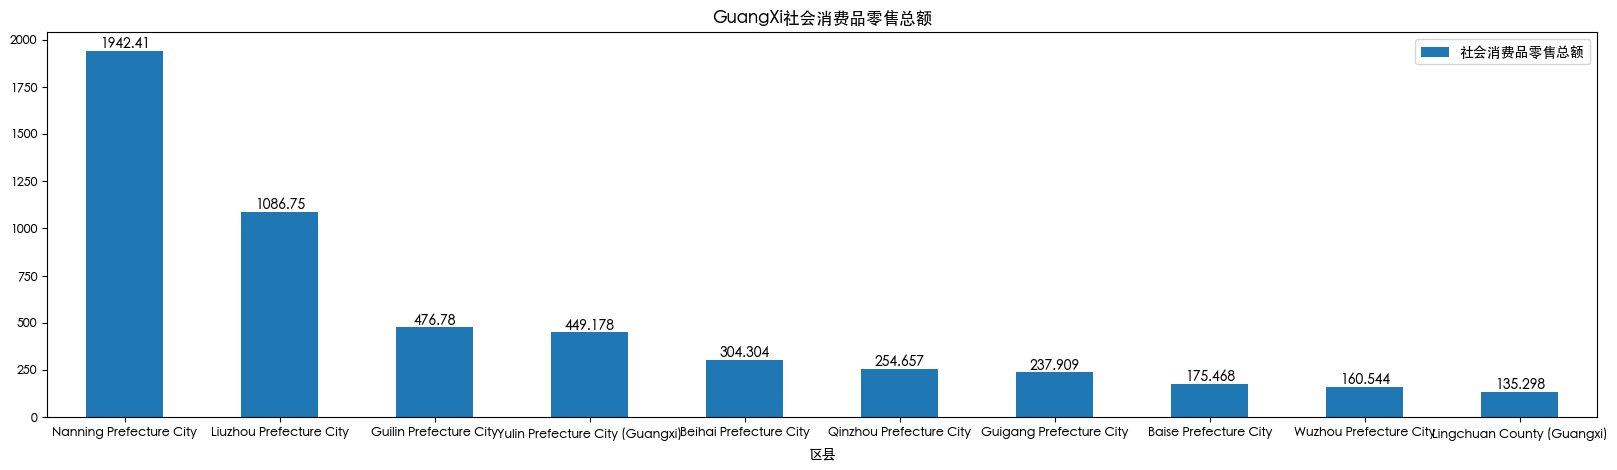

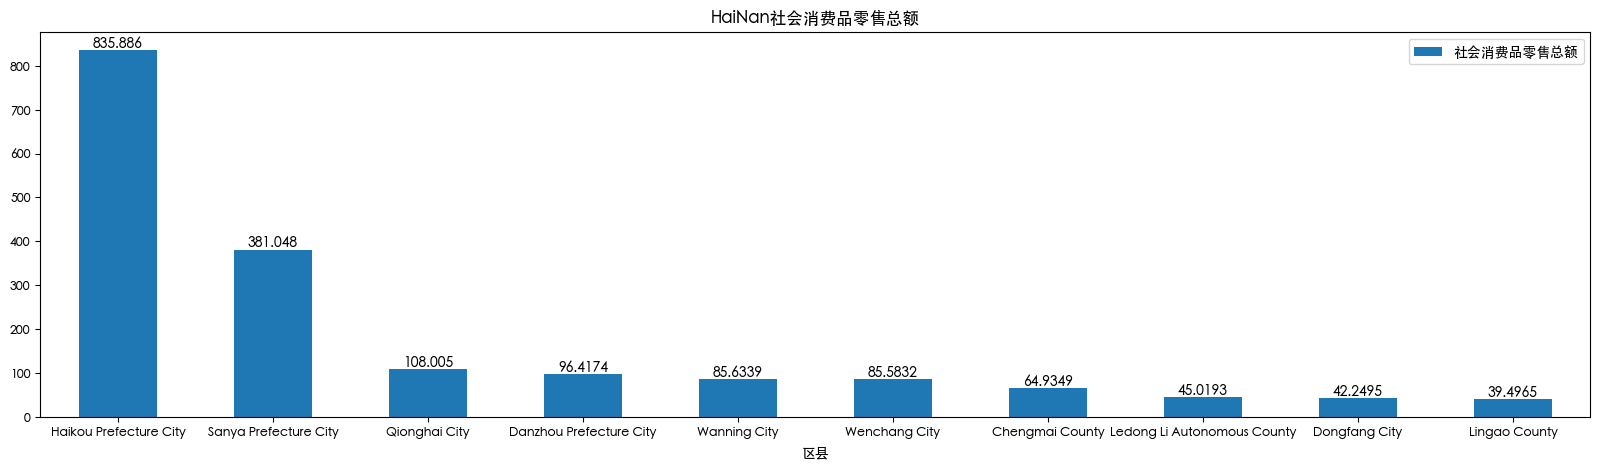

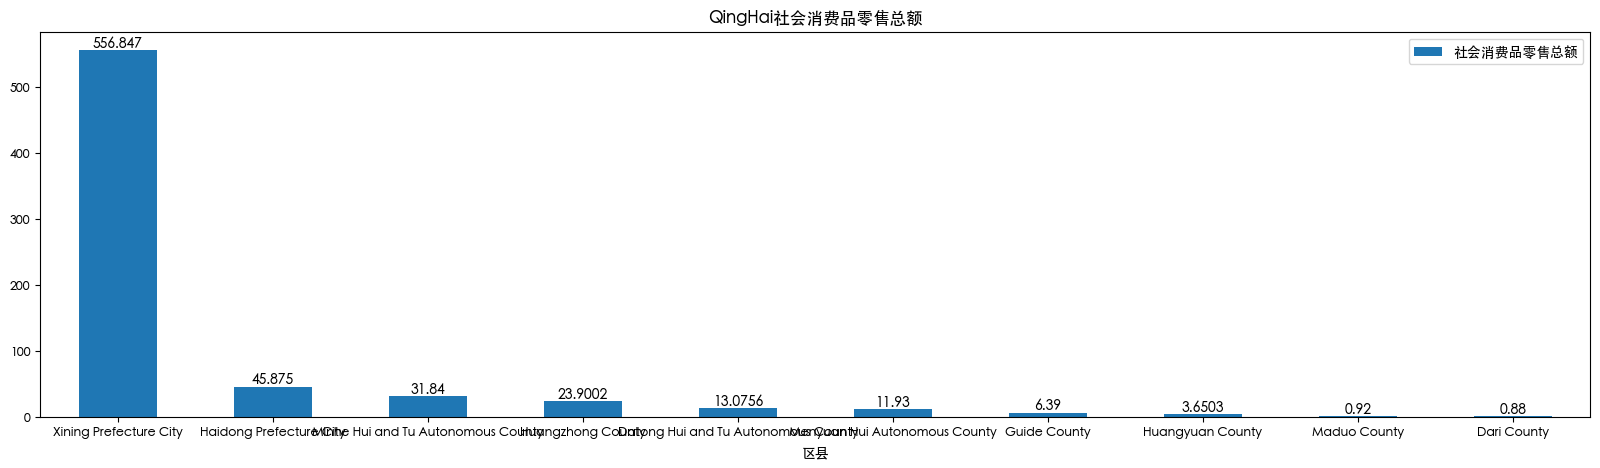

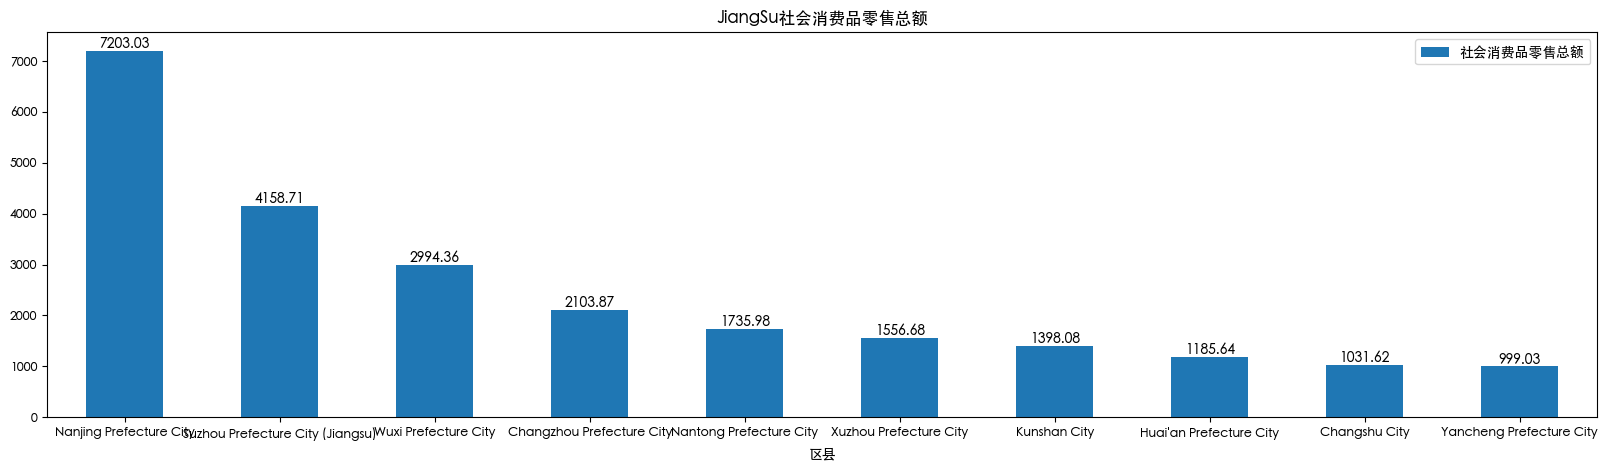

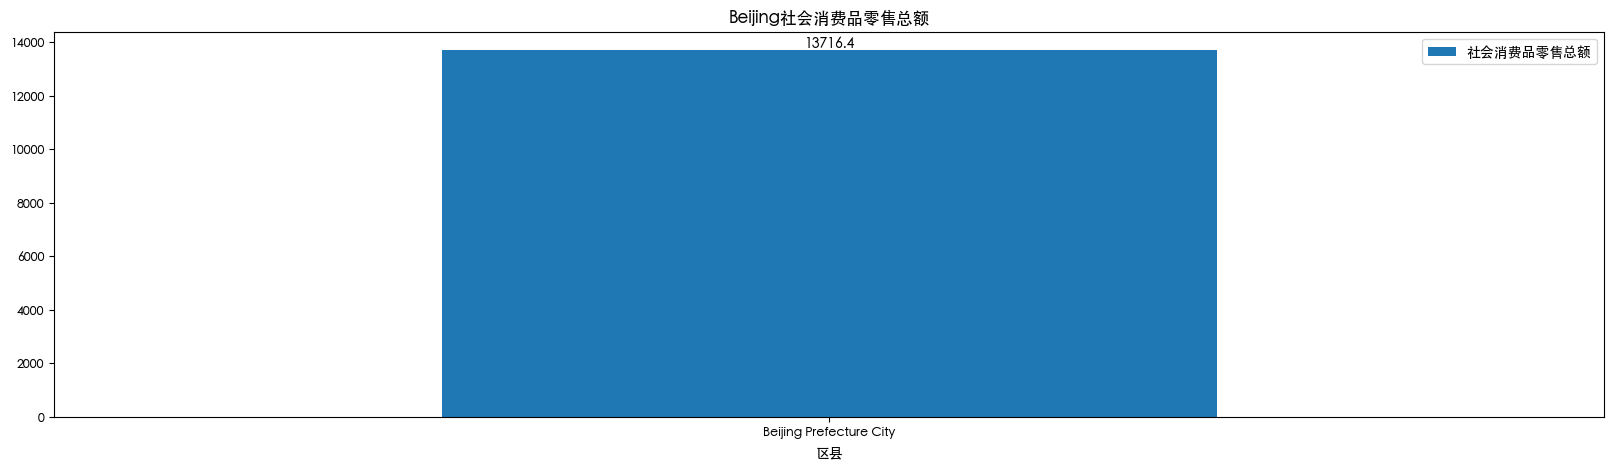

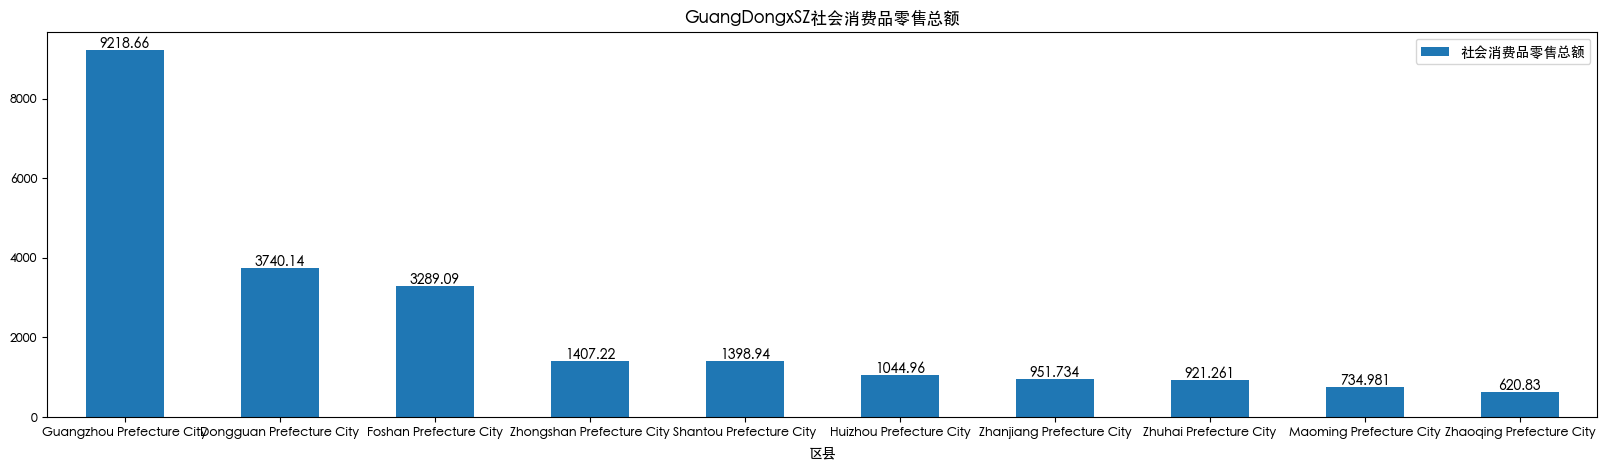

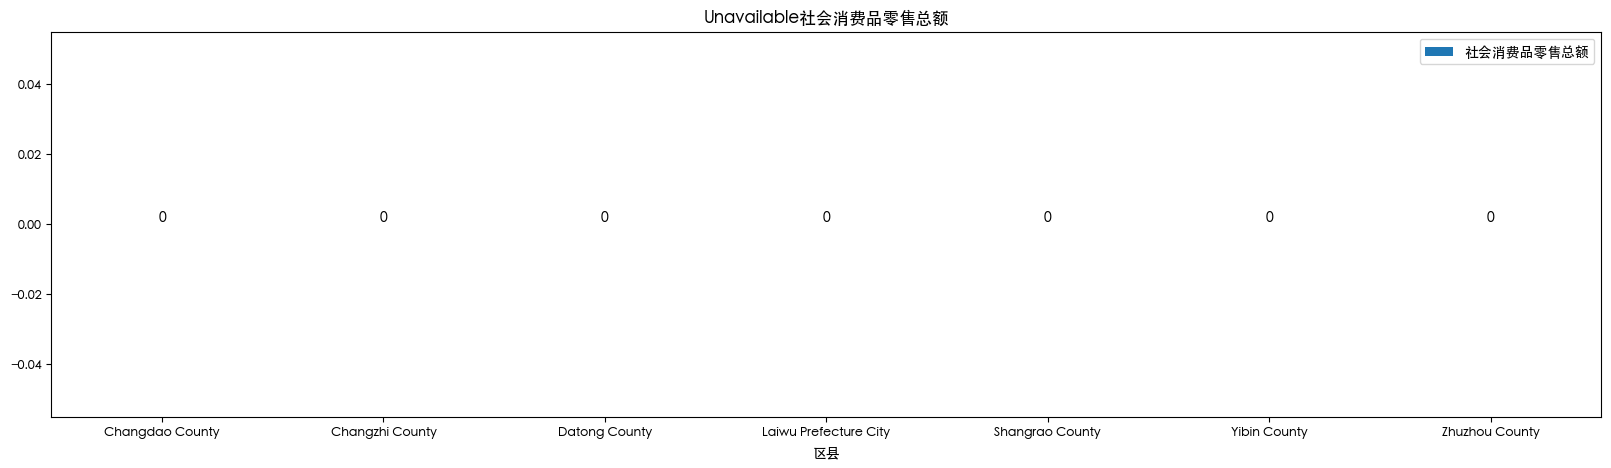

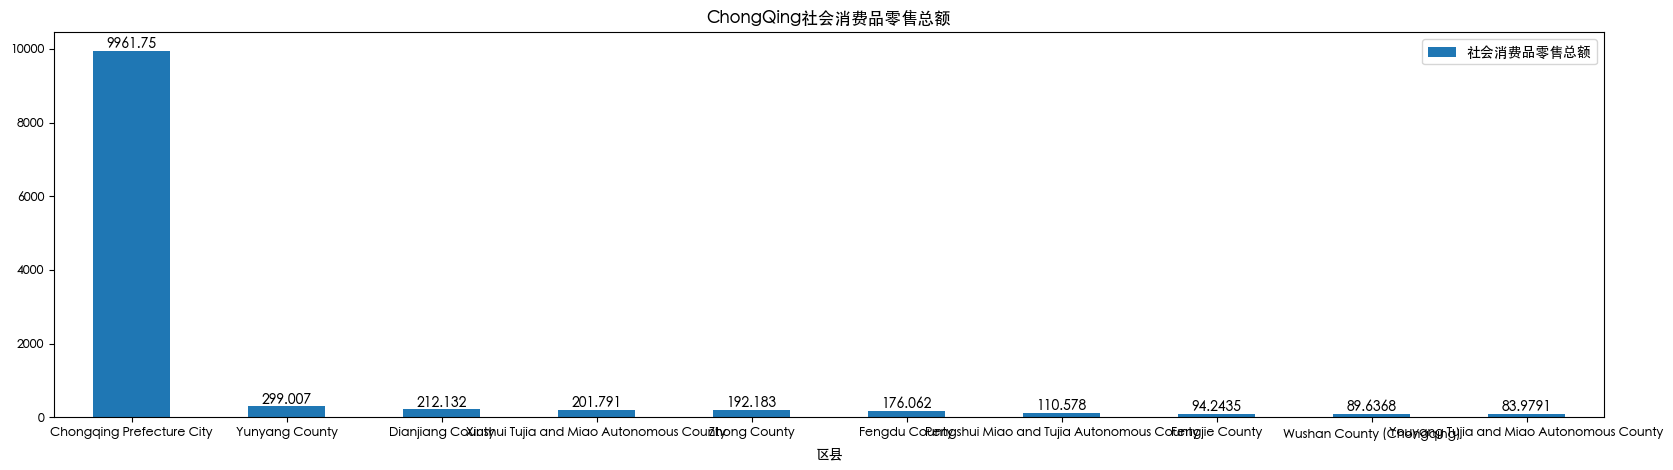

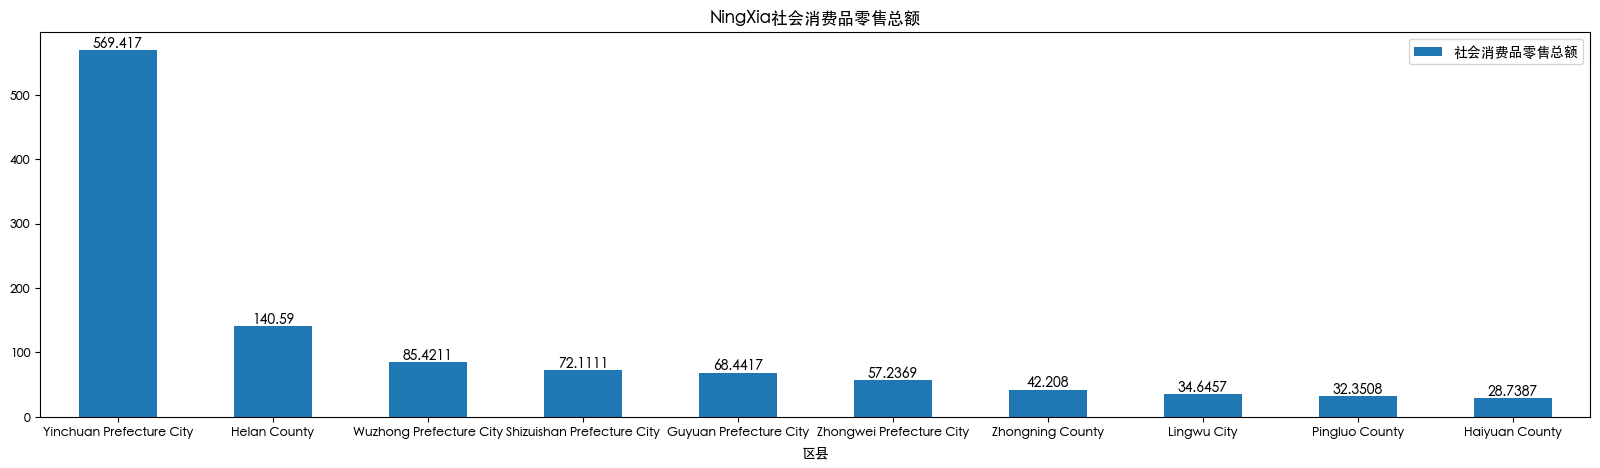

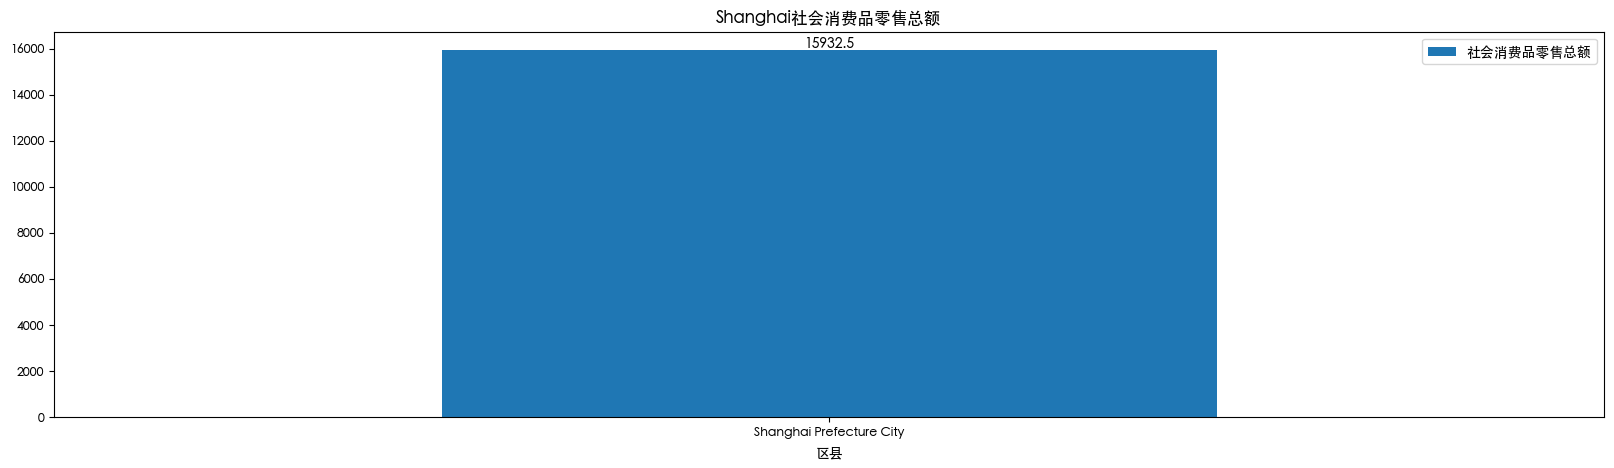

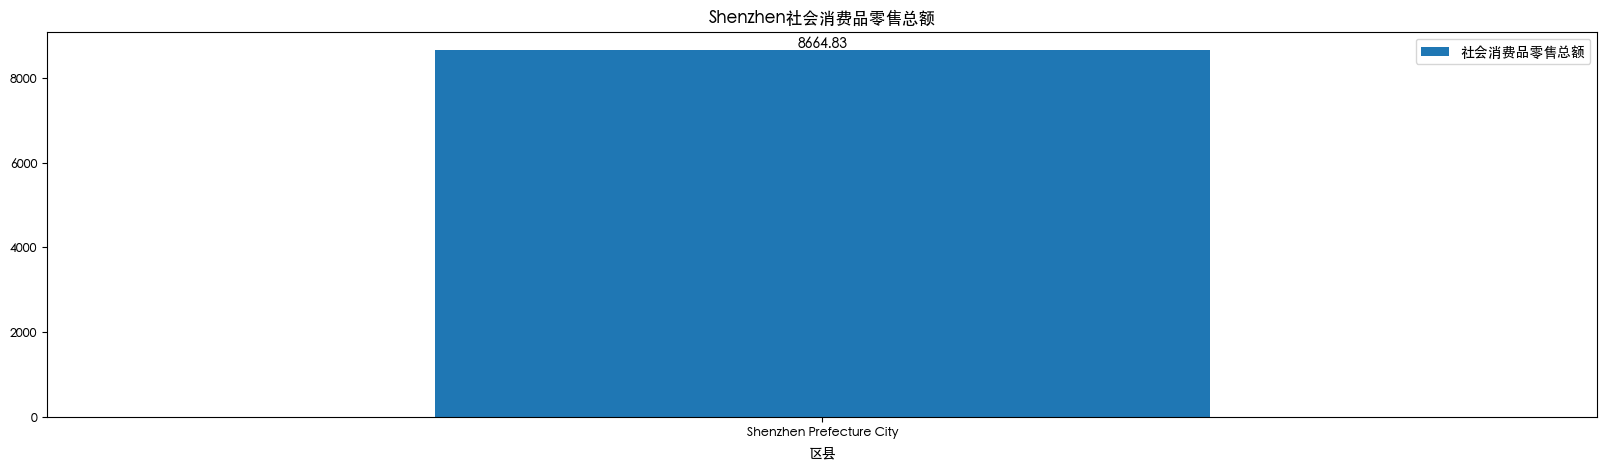

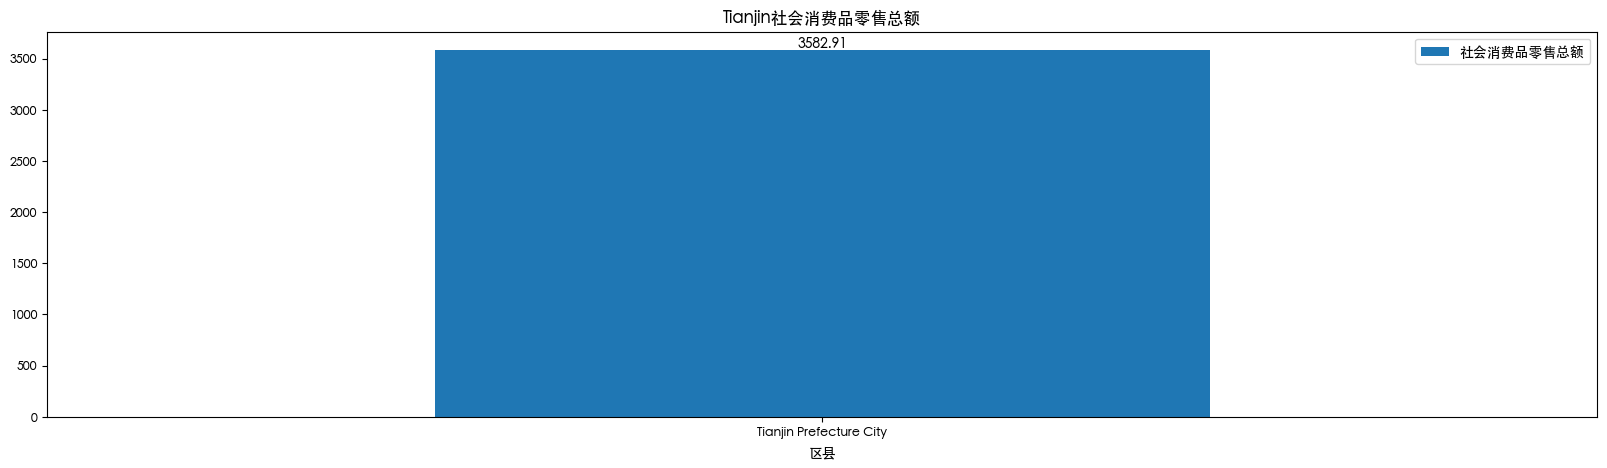

In [6]:

for province in province_lst:
    province_df = df[df['省份'] == province] 
    # print(province)
    for column in column_lst:
        subdf = province_df.nlargest(10, column, keep='all')
        title = str(province)+str(column)
        ax = subdf.plot(x='区县', y=column, kind='bar',rot=0,title=str(province)+str(column), figsize=(20,5),fontsize=9)
        for container in ax.containers:
            ax.bar_label(container)
        plt.savefig('社会消费品零售总额/'+title+".png")
        # print(ax)
        # subdf.plot(x="区县", y=[column], kind="bar")
    